In [3]:
import numpy as np
from mpl_toolkits import mplot3d
from matplotlib import pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display
from scipy import interpolate

import h5py  # http://docs.h5py.org/en/latest/quick.html

import matplotlib as mpl
mpl.rcParams['axes.labelsize'] = 'large'
mpl.rcParams['xtick.labelsize'] = 'large'
mpl.rcParams['ytick.labelsize'] = 'large'
mpl.rcParams['axes.formatter.limits'] = (-3,3)
# axes.formatter.limits : -7, 7

%matplotlib notebook 
from lib_energy_gain import  Field_Integrator_on_axis, OnAxisParticle

# Small waveguide aperture
f=0.292

Set path according to your file system 

Notes on original notebook "Integrate_Ez_on_axis":
- *resolution*
- *z_len*: length of the computation grid in MEEP units. Computed by the shape of the input and the resolution
- *z_coord*: cooridates corresponding to the elements of the field array. For instance, a grid size 2 with resolution 5 leads to 10 elements in the array. The first one corresponds to z=0, the second to z=0.2, third z=0.04 and so on. z_coord stores the z coordinates [0, 0.2, 0.4, 0.6, ...]
- *t_coord*: discrete time steps
- For time periodic interpolation the last point has to be interpolated with the first point. Therefore both the interpolated E_z field and the timepoints have to be extended. The added point will be removed after the interpolation.  
  -> *t_extended*, *on_axis_ez_extended*  


In [5]:
integrator_small_wvg = Field_Integrator_on_axis("Simulation-results/MEEP/2D-hexagonal-PBG-wvg/excite-mounted_2D_wvg-f-0.292/ez.h5", freq=0.292, resolution=20)
particle= OnAxisParticle(0, 1)
integrator_small_wvg.interpolate_with_time_periodictiy()

t_at_end= (integrator_small_wvg.f_ez_extended.y_max - particle.z_0)/(particle.beta * integrator_small_wvg.dt)
integrator_small_wvg.int_over_particle(particle, np.linspace(0, t_at_end, 4000))

0.0008936637863037281

In [ ]:
betas= np.linspace(0.25,1.6,300)
sum_forces_by_beta= np.zeros(betas.shape[0])
for i, b in enumerate(betas):
    particle.beta=b
    t_at_end= (integrator_small_wvg.f_ez_extended.y_max - particle.z_0)/(particle.beta * integrator_small_wvg.dt)
#     t_at_end= (f_ez_extended.y_max - z0)/(beta * dt) # time the particle needs to travel to the end of the structure
    try:
        sum_forces_by_beta[i]=integrator_small_wvg.int_over_particle(particle, np.linspace(0, t_at_end, 4500))
#         sum_forces_by_beta[i]=int_over_particle(np.linspace(t_coord[0], t_at_end, 4500))
    except:
        print("not working beta:", b)
        sum_forces_by_beta[i]=0

# For normalization of data
max_force= sum_forces_by_beta.max()
    
fig_force_by_b = plt.figure()
ax1 = fig_force_by_b.add_subplot(111)
ax1.plot(betas, sum_forces_by_beta/max_force )
ax1.set_ylabel(r"integrated $E_z$")
ax1.set_xlabel(r"velocity $\beta$")
xlimits= ax1.get_xlim()
ax1.axvspan(1,2, color='gray', alpha=0.5)
ax1.set_xlim(xlimits)
ax1.locator_params(axis='y', nbins=5)


ax1.set_title("Relative Energy Gain for $f=0.29$ mode")
fig_force_by_b.tight_layout()

# ax1.set_title

# Large waveguide

In [3]:
integrator_large_wvg = Field_Integrator_on_axis("C:/Users/maxke/switchdrive/Masterarbeit/Simulation-results/MEEP/2D-PBG-large-wvg/excite-mounted_2D_wvg-0.484/ez.h5", freq=0.48, resolution=14)
particle= OnAxisParticle(0, 1)
integrator_large_wvg.interpolate_with_time_periodictiy()

t_at_end= (integrator_large_wvg.f_ez_extended.y_max - particle.z_0)/(particle.beta * integrator_large_wvg.dt)
integrator_large_wvg.int_over_particle(particle, np.linspace(0, t_at_end, 4000))

-0.00224874700580672

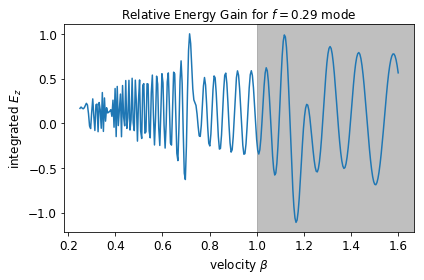

In [4]:
betas= np.linspace(0.25,1.6,300)
sum_forces_by_beta= np.zeros(betas.shape[0])
for i, b in enumerate(betas):
    particle.beta=b
    t_at_end= (integrator_large_wvg.f_ez_extended.y_max - particle.z_0)/(particle.beta * integrator_large_wvg.dt)
#     t_at_end= (f_ez_extended.y_max - z0)/(beta * dt) # time the particle needs to travel to the end of the structure
    try:
        sum_forces_by_beta[i]=integrator_large_wvg.int_over_particle(particle, np.linspace(0, t_at_end, 4500))
#         sum_forces_by_beta[i]=int_over_particle(np.linspace(t_coord[0], t_at_end, 4500))
    except:
        print("not working beta:", b)
        sum_forces_by_beta[i]=0

# For normalization of data
max_force= sum_forces_by_beta.max()
    
fig_force_by_b = plt.figure()
ax1 = fig_force_by_b.add_subplot(111)
ax1.plot(betas, sum_forces_by_beta/max_force )
ax1.set_ylabel(r"integrated $E_z$")
ax1.set_xlabel(r"velocity $\beta$")
xlimits= ax1.get_xlim()
ax1.axvspan(1,2, color='gray', alpha=0.5)
ax1.set_xlim(xlimits)
ax1.locator_params(axis='y', nbins=5)


ax1.set_title("Relative Energy Gain for $f=0.48$ mode")
fig_force_by_b.tight_layout()

# ax1.set_title

# Plot 2D interpolation and temporal periodic continuation
- here, the small waveguide data was used examplarily
- the field is extended over 4 temporal periods 

<IPython.core.display.Javascript object>


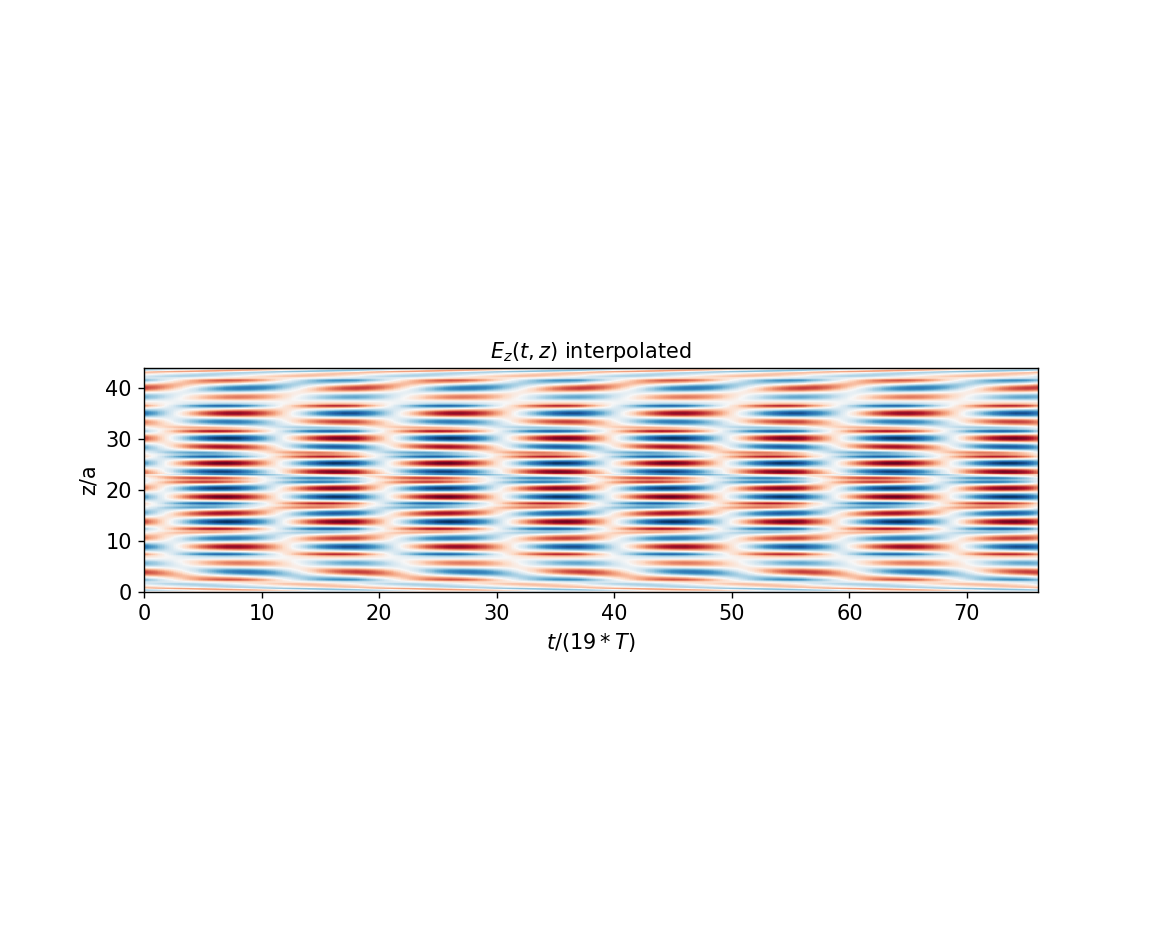

Text(0.5,1,'$E_z(t,z) $ interpolated')

In [42]:
t=np.linspace(0, 4* integrator_small_wvg.t_dim, num=5*100)
z=np.linspace(0, integrator_small_wvg.z_len, integrator_small_wvg.ez_by_z_t.shape[0], endpoint=False)
ez_over_periods = integrator_small_wvg.periodic_E_z(t,z)

fig_cont, ax_cont = plt.subplots()
ax_cont.imshow(ez_over_periods, origin='lower', extent=(0, t[-1], 0, z[-1]), aspect= 0.25* t[-1]/z[-1], cmap="RdBu")
ax_cont.set_xlabel(r"$t/(19*T)$")
ax_cont.set_ylabel("z/a")
ax_cont.set_title(r"$E_z(t,z) $ interpolated")